In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable

# plot setting
plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8

color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

figure_path = '/Users/gogyeongtae/Library/CloudStorage/Dropbox/KNU_Lab_Research/2023_ASF/Submission/20240601_Frontiers_Revision_1st/Figure/'
gpd_file_path = '../Data/'
gpd_file_name = 'sig_5179.shp'
loc_file_name = 'ASF_WildBoar_Update.csv'

location = pd.read_csv(gpd_file_path + loc_file_name)
korea = gpd.read_file(gpd_file_path + gpd_file_name)

korea = korea.to_crs(epsg=4326)

# error correction
location.loc[location['경도'].str[-2] == '.','경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format = '%Y-%m-%d')
location = location.rename(columns = {'위도' : 'y', '경도' : 'x'}, inplace  = False)

# Year
location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

# 2022년 포아송
## : 47930(울진군), 43130(충주시), 42130(원주시)

# 2022년 NB
## : 47930(울진군), 47770(영덕군), 47250(상주시)

# 2022년 ZF
## : 43150(제천시), 43800(단양군), 42230(삼척시), 47930(울진군)

# 2023년 포아송
## : 47930(울진군), 42130(원주시), 43130(충주시)

# 2023년 NB
## : 47930(울진군), 47770(영덕군), 42780(철원군), 42790(화천군)

# 2023년 ZF
## : 43150(제천시), 43800(단양군), 42230(삼척시), 47930(울진군)

# Results for scanstatistic
korea.loc[korea['SIG_CD'] == '47280', '2022_car_PS'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2022_car_PS'] = 3
korea.loc[korea['SIG_CD'] == '42130', '2022_car_PS'] = 2
korea.loc[korea['SIG_CD'] == '47250', '2022_car_PS'] = 2
korea.loc[korea['SIG_CD'] == '47920', '2022_car_PS'] = 1

# Infected for period1
korea.loc[korea['SIG_CD'] == '47280', '2022_infected'] = 8
korea.loc[korea['SIG_CD'] == '43130', '2022_infected'] = 4
korea.loc[korea['SIG_CD'] == '42130', '2022_infected'] = 3
korea.loc[korea['SIG_CD'] == '47250', '2022_infected'] = 3
korea.loc[korea['SIG_CD'] == '47920', '2022_infected'] = 2
korea.loc[korea['SIG_CD'] == '42190', '2022_infected'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_PS_error1'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2022_car_PS_error1'] = 3
korea.loc[korea['SIG_CD'] == '42130', '2022_car_PS_error1'] = 2
korea.loc[korea['SIG_CD'] == '47250', '2022_car_PS_error1'] = 2
korea.loc[korea['SIG_CD'] == '47920', '2022_car_PS_error1'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_PS_error2'] = 5
korea.loc[korea['SIG_CD'] == '43130', '2022_car_PS_error2'] = 2
korea.loc[korea['SIG_CD'] == '42130', '2022_car_PS_error2'] = 2
korea.loc[korea['SIG_CD'] == '47250', '2022_car_PS_error2'] = 2
korea.loc[korea['SIG_CD'] == '47920', '2022_car_PS_error2'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_PS_error3'] = 5
korea.loc[korea['SIG_CD'] == '43130', '2022_car_PS_error3'] = 2
korea.loc[korea['SIG_CD'] == '42130', '2022_car_PS_error3'] = 1
korea.loc[korea['SIG_CD'] == '47250', '2022_car_PS_error3'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2022_car_PS_error3'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_NB'] = 5
korea.loc[korea['SIG_CD'] == '43130', '2022_car_NB'] = 1
korea.loc[korea['SIG_CD'] == '42130', '2022_car_NB'] = 1
korea.loc[korea['SIG_CD'] == '47250', '2022_car_NB'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_NB_error1'] = 5
korea.loc[korea['SIG_CD'] == '43130', '2022_car_NB_error1'] = 1
korea.loc[korea['SIG_CD'] == '42130', '2022_car_NB_error1'] = 1
korea.loc[korea['SIG_CD'] == '47250', '2022_car_NB_error1'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_NB_error2'] = 3
korea.loc[korea['SIG_CD'] == '47250', '2022_car_NB_error2'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_NB_error3'] = 0
korea.loc[korea['SIG_CD'] == '47250', '2022_car_NB_error3'] = 0

korea.loc[korea['SIG_CD'] == '47280', '2022_car_ZIP'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2022_car_ZIP'] = 3
korea.loc[korea['SIG_CD'] == '47920', '2022_car_ZIP'] = 3
korea.loc[korea['SIG_CD'] == '42130', '2022_car_ZIP'] = 2
korea.loc[korea['SIG_CD'] == '47250', '2022_car_ZIP'] = 2

korea.loc[korea['SIG_CD'] == '47280', '2022_car_ZIP_error1'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2022_car_ZIP_error1'] = 3
korea.loc[korea['SIG_CD'] == '47920', '2022_car_ZIP_error1'] = 3
korea.loc[korea['SIG_CD'] == '42130', '2022_car_ZIP_error1'] = 2
korea.loc[korea['SIG_CD'] == '47250', '2022_car_ZIP_error1'] = 2

korea.loc[korea['SIG_CD'] == '47280', '2022_car_ZIP_error2'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2022_car_ZIP_error2'] = 2
korea.loc[korea['SIG_CD'] == '42130', '2022_car_ZIP_error2'] = 2
korea.loc[korea['SIG_CD'] == '47920', '2022_car_ZIP_error2'] = 1
korea.loc[korea['SIG_CD'] == '47250', '2022_car_ZIP_error2'] = 1

korea.loc[korea['SIG_CD'] == '47280', '2022_car_ZIP_error3'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2022_car_ZIP_error3'] = 3
korea.loc[korea['SIG_CD'] == '42130', '2022_car_ZIP_error3'] = 2
korea.loc[korea['SIG_CD'] == '47920', '2022_car_ZIP_error3'] = 1
korea.loc[korea['SIG_CD'] == '47250', '2022_car_ZIP_error3'] = 1

korea['2022_car_NB'] = korea['2022_car_NB'].fillna(0, inplace = False)
korea['2022_car_ZIP'] = korea['2022_car_ZIP'].fillna(0, inplace = False)
korea['2022_car_PS'] = korea['2022_car_PS'].fillna(0, inplace = False)


korea.loc[korea['SIG_CD'] == '42130', '2023_car_PS'] = 10
korea.loc[korea['SIG_CD'] == '42230', '2023_car_PS'] = 7
korea.loc[korea['SIG_CD'] == '43130', '2023_car_PS'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_PS'] = 7
korea.loc[korea['SIG_CD'] == '47250', '2023_car_PS'] = 6
korea.loc[korea['SIG_CD'] == '47930', '2023_car_PS'] = 6
korea.loc[korea['SIG_CD'] == '42190', '2023_car_PS'] = 3
korea.loc[korea['SIG_CD'] == '47210', '2023_car_PS'] = 2
korea.loc[korea['SIG_CD'] == '42750', '2023_car_PS'] = 2
korea.loc[korea['SIG_CD'] == '47900', '2023_car_PS'] = 2
korea.loc[korea['SIG_CD'] == '42730', '2023_car_PS'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_PS'] = 1

korea.loc[korea['SIG_CD'] == '42130', '2023_infected'] = 13
korea.loc[korea['SIG_CD'] == '42230', '2023_infected'] = 10
korea.loc[korea['SIG_CD'] == '43130', '2023_infected'] = 10
korea.loc[korea['SIG_CD'] == '43800', '2023_infected'] = 10
korea.loc[korea['SIG_CD'] == '47250', '2023_infected'] = 10
korea.loc[korea['SIG_CD'] == '47930', '2023_infected'] = 7
korea.loc[korea['SIG_CD'] == '42190', '2023_infected'] = 6
korea.loc[korea['SIG_CD'] == '47280', '2023_infected'] = 4
korea.loc[korea['SIG_CD'] == '47920', '2023_infected'] = 4
korea.loc[korea['SIG_CD'] == '42750', '2023_infected'] = 4
korea.loc[korea['SIG_CD'] == '47210', '2023_infected'] = 3
korea.loc[korea['SIG_CD'] == '47770', '2023_infected'] = 3
korea.loc[korea['SIG_CD'] == '47900', '2023_infected'] = 3
korea.loc[korea['SIG_CD'] == '42730', '2023_infected'] = 2
korea.loc[korea['SIG_CD'] == '43760', '2023_infected'] = 2
korea.loc[korea['SIG_CD'] == '41800', '2023_infected'] = 1
korea.loc[korea['SIG_CD'] == '42780', '2023_infected'] = 1
korea.loc[korea['SIG_CD'] == '42790', '2023_infected'] = 1
korea.loc[korea['SIG_CD'] == '43150', '2023_infected'] = 1
korea.loc[korea['SIG_CD'] == '43770', '2023_infected'] = 1


korea.loc[korea['SIG_CD'] == '42130', '2023_car_PS_error1'] = 10
korea.loc[korea['SIG_CD'] == '42230', '2023_car_PS_error1'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_PS_error1'] = 7
korea.loc[korea['SIG_CD'] == '47930', '2023_car_PS_error1'] = 6
korea.loc[korea['SIG_CD'] == '47250', '2023_car_PS_error1'] = 5
korea.loc[korea['SIG_CD'] == '43130', '2023_car_PS_error1'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_PS_error1'] = 3
korea.loc[korea['SIG_CD'] == '47210', '2023_car_PS_error1'] = 2
korea.loc[korea['SIG_CD'] == '42750', '2023_car_PS_error1'] = 1
korea.loc[korea['SIG_CD'] == '47900', '2023_car_PS_error1'] = 1
korea.loc[korea['SIG_CD'] == '42730', '2023_car_PS_error1'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_PS_error1'] = 1

# 2023 Poisson Error2
korea.loc[korea['SIG_CD'] == '42130', '2023_car_PS_error2'] = 10
korea.loc[korea['SIG_CD'] == '42230', '2023_car_PS_error2'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_PS_error2'] = 7
korea.loc[korea['SIG_CD'] == '47930', '2023_car_PS_error2'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2023_car_PS_error2'] = 5
korea.loc[korea['SIG_CD'] == '47250', '2023_car_PS_error2'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_PS_error2'] = 3
korea.loc[korea['SIG_CD'] == '47210', '2023_car_PS_error2'] = 2
korea.loc[korea['SIG_CD'] == '42730', '2023_car_PS_error2'] = 1
korea.loc[korea['SIG_CD'] == '42750', '2023_car_PS_error2'] = 1
korea.loc[korea['SIG_CD'] == '47900', '2023_car_PS_error2'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_PS_error2'] = 1

# 2023 Poisson Error3
korea.loc[korea['SIG_CD'] == '42130', '2023_car_PS_error3'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_PS_error3'] = 7
korea.loc[korea['SIG_CD'] == '42230', '2023_car_PS_error3'] = 6
korea.loc[korea['SIG_CD'] == '47930', '2023_car_PS_error3'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2023_car_PS_error3'] = 5
korea.loc[korea['SIG_CD'] == '47250', '2023_car_PS_error3'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_PS_error3'] = 3
korea.loc[korea['SIG_CD'] == '47210', '2023_car_PS_error3'] = 2
korea.loc[korea['SIG_CD'] == '42730', '2023_car_PS_error3'] = 1
korea.loc[korea['SIG_CD'] == '47900', '2023_car_PS_error3'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_PS_error3'] = 1

# 2023 NB
korea.loc[korea['SIG_CD'] == '42130', '2023_car_NB'] = 9 
korea.loc[korea['SIG_CD'] == '43800', '2023_car_NB'] = 7
korea.loc[korea['SIG_CD'] == '42230', '2023_car_NB'] = 6
korea.loc[korea['SIG_CD'] == '47930', '2023_car_NB'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2023_car_NB'] = 5
korea.loc[korea['SIG_CD'] == '47250', '2023_car_NB'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_NB'] = 3
korea.loc[korea['SIG_CD'] == '47210', '2023_car_NB'] = 2
korea.loc[korea['SIG_CD'] == '42750', '2023_car_NB'] = 1
korea.loc[korea['SIG_CD'] == '47900', '2023_car_NB'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_NB'] = 1

korea.loc[korea['SIG_CD'] == '42130', '2023_car_NB_error1'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_NB_error1'] = 7
korea.loc[korea['SIG_CD'] == '42230', '2023_car_NB_error1'] = 6
korea.loc[korea['SIG_CD'] == '47930', '2023_car_NB_error1'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2023_car_NB_error1'] = 5
korea.loc[korea['SIG_CD'] == '47250', '2023_car_NB_error1'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_NB_error1'] = 3
korea.loc[korea['SIG_CD'] == '42750', '2023_car_NB_error1'] = 1
korea.loc[korea['SIG_CD'] == '47900', '2023_car_NB_error1'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_NB_error1'] = 1


korea.loc[korea['SIG_CD'] == '42130', '2023_car_NB_error2'] = 7 
korea.loc[korea['SIG_CD'] == '43800', '2023_car_NB_error2'] = 7
korea.loc[korea['SIG_CD'] == '42230', '2023_car_NB_error2'] = 6
korea.loc[korea['SIG_CD'] == '47930', '2023_car_NB_error2'] = 6
korea.loc[korea['SIG_CD'] == '43130', '2023_car_NB_error2'] = 5
korea.loc[korea['SIG_CD'] == '47250', '2023_car_NB_error2'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_NB_error2'] = 3
korea.loc[korea['SIG_CD'] == '42750', '2023_car_NB_error2'] = 1
korea.loc[korea['SIG_CD'] == '47900', '2023_car_NB_error2'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_NB_error2'] = 1


korea.loc[korea['SIG_CD'] == '43800', '2023_car_NB_error3'] = 7
korea.loc[korea['SIG_CD'] == '47930', '2023_car_NB_error3'] = 6
korea.loc[korea['SIG_CD'] == '42130', '2023_car_NB_error3'] = 5
korea.loc[korea['SIG_CD'] == '42230', '2023_car_NB_error3'] = 5
korea.loc[korea['SIG_CD'] == '47250', '2023_car_NB_error3'] = 4
korea.loc[korea['SIG_CD'] == '42190', '2023_car_NB_error3'] = 3
korea.loc[korea['SIG_CD'] == '43130', '2023_car_NB_error3'] = 2
korea.loc[korea['SIG_CD'] == '42750', '2023_car_NB_error3'] = 1


korea.loc[korea['SIG_CD'] == '42130', '2023_car_ZIP'] = 10
korea.loc[korea['SIG_CD'] == '42230', '2023_car_ZIP'] = 7
korea.loc[korea['SIG_CD'] == '43130', '2023_car_ZIP'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_ZIP'] = 7
korea.loc[korea['SIG_CD'] == '47250', '2023_car_ZIP'] = 7
korea.loc[korea['SIG_CD'] == '47930', '2023_car_ZIP'] = 6
korea.loc[korea['SIG_CD'] == '42750', '2023_car_ZIP'] = 4
korea.loc[korea['SIG_CD'] == '42190', '2023_car_ZIP'] = 3
korea.loc[korea['SIG_CD'] == '47900', '2023_car_ZIP'] = 2
korea.loc[korea['SIG_CD'] == '47210', '2023_car_ZIP'] = 2
korea.loc[korea['SIG_CD'] == '43760', '2023_car_ZIP'] = 2
korea.loc[korea['SIG_CD'] == '42730', '2023_car_ZIP'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_ZIP'] = 1

korea.loc[korea['SIG_CD'] == '42130', '2023_car_ZIP_error1'] = 10
korea.loc[korea['SIG_CD'] == '42230', '2023_car_ZIP_error1'] = 7
korea.loc[korea['SIG_CD'] == '43130', '2023_car_ZIP_error1'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_ZIP_error1'] = 7
korea.loc[korea['SIG_CD'] == '47250', '2023_car_ZIP_error1'] = 7
korea.loc[korea['SIG_CD'] == '47930', '2023_car_ZIP_error1'] = 6
korea.loc[korea['SIG_CD'] == '42750', '2023_car_ZIP_error1'] = 4
korea.loc[korea['SIG_CD'] == '42190', '2023_car_ZIP_error1'] = 3
korea.loc[korea['SIG_CD'] == '47900', '2023_car_ZIP_error1'] = 2
korea.loc[korea['SIG_CD'] == '47210', '2023_car_ZIP_error1'] = 2
korea.loc[korea['SIG_CD'] == '42730', '2023_car_ZIP_error1'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_ZIP_error1'] = 1

korea.loc[korea['SIG_CD'] == '42130', '2023_car_ZIP_error2'] = 10
korea.loc[korea['SIG_CD'] == '42230', '2023_car_ZIP_error2'] = 7
korea.loc[korea['SIG_CD'] == '43130', '2023_car_ZIP_error2'] = 7
korea.loc[korea['SIG_CD'] == '43800', '2023_car_ZIP_error2'] = 7
korea.loc[korea['SIG_CD'] == '47250', '2023_car_ZIP_error2'] = 7
korea.loc[korea['SIG_CD'] == '47930', '2023_car_ZIP_error2'] = 6
korea.loc[korea['SIG_CD'] == '42750', '2023_car_ZIP_error2'] = 4
korea.loc[korea['SIG_CD'] == '42190', '2023_car_ZIP_error2'] = 3
korea.loc[korea['SIG_CD'] == '47900', '2023_car_ZIP_error2'] = 2
korea.loc[korea['SIG_CD'] == '47210', '2023_car_ZIP_error2'] = 2
korea.loc[korea['SIG_CD'] == '42730', '2023_car_ZIP_error2'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_ZIP_error2'] = 1

korea.loc[korea['SIG_CD'] == '42130', '2023_car_ZIP_error3'] = 10
korea.loc[korea['SIG_CD'] == '43800', '2023_car_ZIP_error3'] = 7
korea.loc[korea['SIG_CD'] == '42230', '2023_car_ZIP_error3'] = 6
korea.loc[korea['SIG_CD'] == '47930', '2023_car_ZIP_error3'] = 6
korea.loc[korea['SIG_CD'] == '47250', '2023_car_ZIP_error3'] = 5
korea.loc[korea['SIG_CD'] == '43130', '2023_car_ZIP_error3'] = 5
korea.loc[korea['SIG_CD'] == '42190', '2023_car_ZIP_error3'] = 3
korea.loc[korea['SIG_CD'] == '47900', '2023_car_ZIP_error3'] = 2
korea.loc[korea['SIG_CD'] == '47210', '2023_car_ZIP_error3'] = 2
korea.loc[korea['SIG_CD'] == '42750', '2023_car_ZIP_error3'] = 1
korea.loc[korea['SIG_CD'] == '47920', '2023_car_ZIP_error3'] = 1

korea['2023_car_NB'] = korea['2023_car_NB'].fillna(0, inplace = False)
korea['2023_car_ZIP'] = korea['2023_car_ZIP'].fillna(0, inplace = False)
korea['2023_car_PS'] = korea['2023_car_PS'].fillna(0, inplace = False)


location_2023_1 = location_2023.query('확진 >= "2023-01-01" & 확진 < "2023-02-01"')
location_2023_2 = location_2023.query('확진 >= "2023-02-01" & 확진 < "2023-03-01"')
location_2023_3 = location_2023.query('확진 >= "2023-03-01" & 확진 < "2023-04-01"')
location_2023_4 = location_2023.query('확진 >= "2023-04-01" & 확진 < "2023-05-01"')

location_2022_9 = location_2022.query('확진 >= "2022-09-01" & 확진 < "2022-10-01"')
location_2022_10 = location_2022.query('확진 >= "2022-10-01" & 확진 < "2022-11-01"')
location_2022_11 = location_2022.query('확진 >= "2022-11-01" & 확진 < "2022-12-01"')
location_2022_12 = location_2022.query('확진 >= "2022-12-01" & 확진 < "2023-01-01"')


most_indexes = korea.loc[korea['SIG_KOR_NM'].isin(["문경시", "충주시"]), :].index
korea.loc[most_indexes[1], '2022_most'] = 1
korea.loc[most_indexes[0], '2023_most'] = 1
korea.fillna(0, inplace = True)

most_indexes = korea.loc[korea['SIG_KOR_NM'].isin(["문경시", "원주시"]), :].index
korea.loc[most_indexes[1], '2022_model_most'] = 1
korea.loc[most_indexes[0], '2023_model_most'] = 1
korea.fillna(0, inplace = True)

korea['2022_combined'] = korea['2022_most'].astype(str) + '-' + korea['2022_model_most'].astype(str)
korea['2023_combined'] = korea['2023_most'].astype(str) + '-' + korea['2023_model_most'].astype(str)

## Figure 6

In [5]:
from matplotlib.colors import Normalize, LinearSegmentedColormap, to_rgba
from matplotlib.cm import ScalarMappable
import warnings
warnings.filterwarnings("ignore")

base_cmap = plt.cm.get_cmap('Reds')
colors = [base_cmap(i) for i in range(base_cmap.N)]

# 낮은 값에서 높은 값으로 갈수록 투명도 감소
max_value = 13
start = 0.1  # 시작 투명도
stop = 1  # 끝 투명도
max_value = len(colors)  # 이제 max_value는 colors의 길이와 같습니다.
alpha_values = np.linspace(start, stop, max_value)  # 모든 색상에 대해 투명도 값을 생성
new_colors = [(*to_rgba(color)[:3], alpha) for color, alpha in zip(colors, alpha_values)]  # 모든 색상에 대해 새로운 색상-투명도 쌍을 생성

# 13 이상의 값은 13에 해당하는 투명도를 사용
for i in range(max_value, len(colors)):
    new_colors.append((*to_rgba(colors[max_value-1])[:3], alpha_values[-1]))

custom_cmap = LinearSegmentedColormap.from_list("custom_reds", new_colors)

base_cmap2 = plt.cm.get_cmap('Blues')
colors2 = [base_cmap2(i) for i in range(base_cmap2.N)]

# 낮은 값에서 높은 값으로 갈수록 투명도 감소
max_value = 13
start = 0.1  # 시작 투명도
stop = 1  # 끝 투명도
max_value = len(colors2)  # 이제 max_value는 colors의 길이와 같습니다.
alpha_values = np.linspace(start, stop, max_value)  # 모든 색상에 대해 투명도 값을 생성
new_colors2 = [(*to_rgba(color)[:3], alpha) for color, alpha in zip(colors2, alpha_values)]  # 모든 색상에 대해 새로운 색상-투명도 쌍을 생성

# 13 이상의 값은 13에 해당하는 투명도를 사용
for i in range(max_value, len(colors2)):
    new_colors2.append(*to_rgba(colors2[max_value-1])[:3], alpha_values[-1])
                       
custom_cmap2 = LinearSegmentedColormap.from_list("custom_blues", new_colors2)


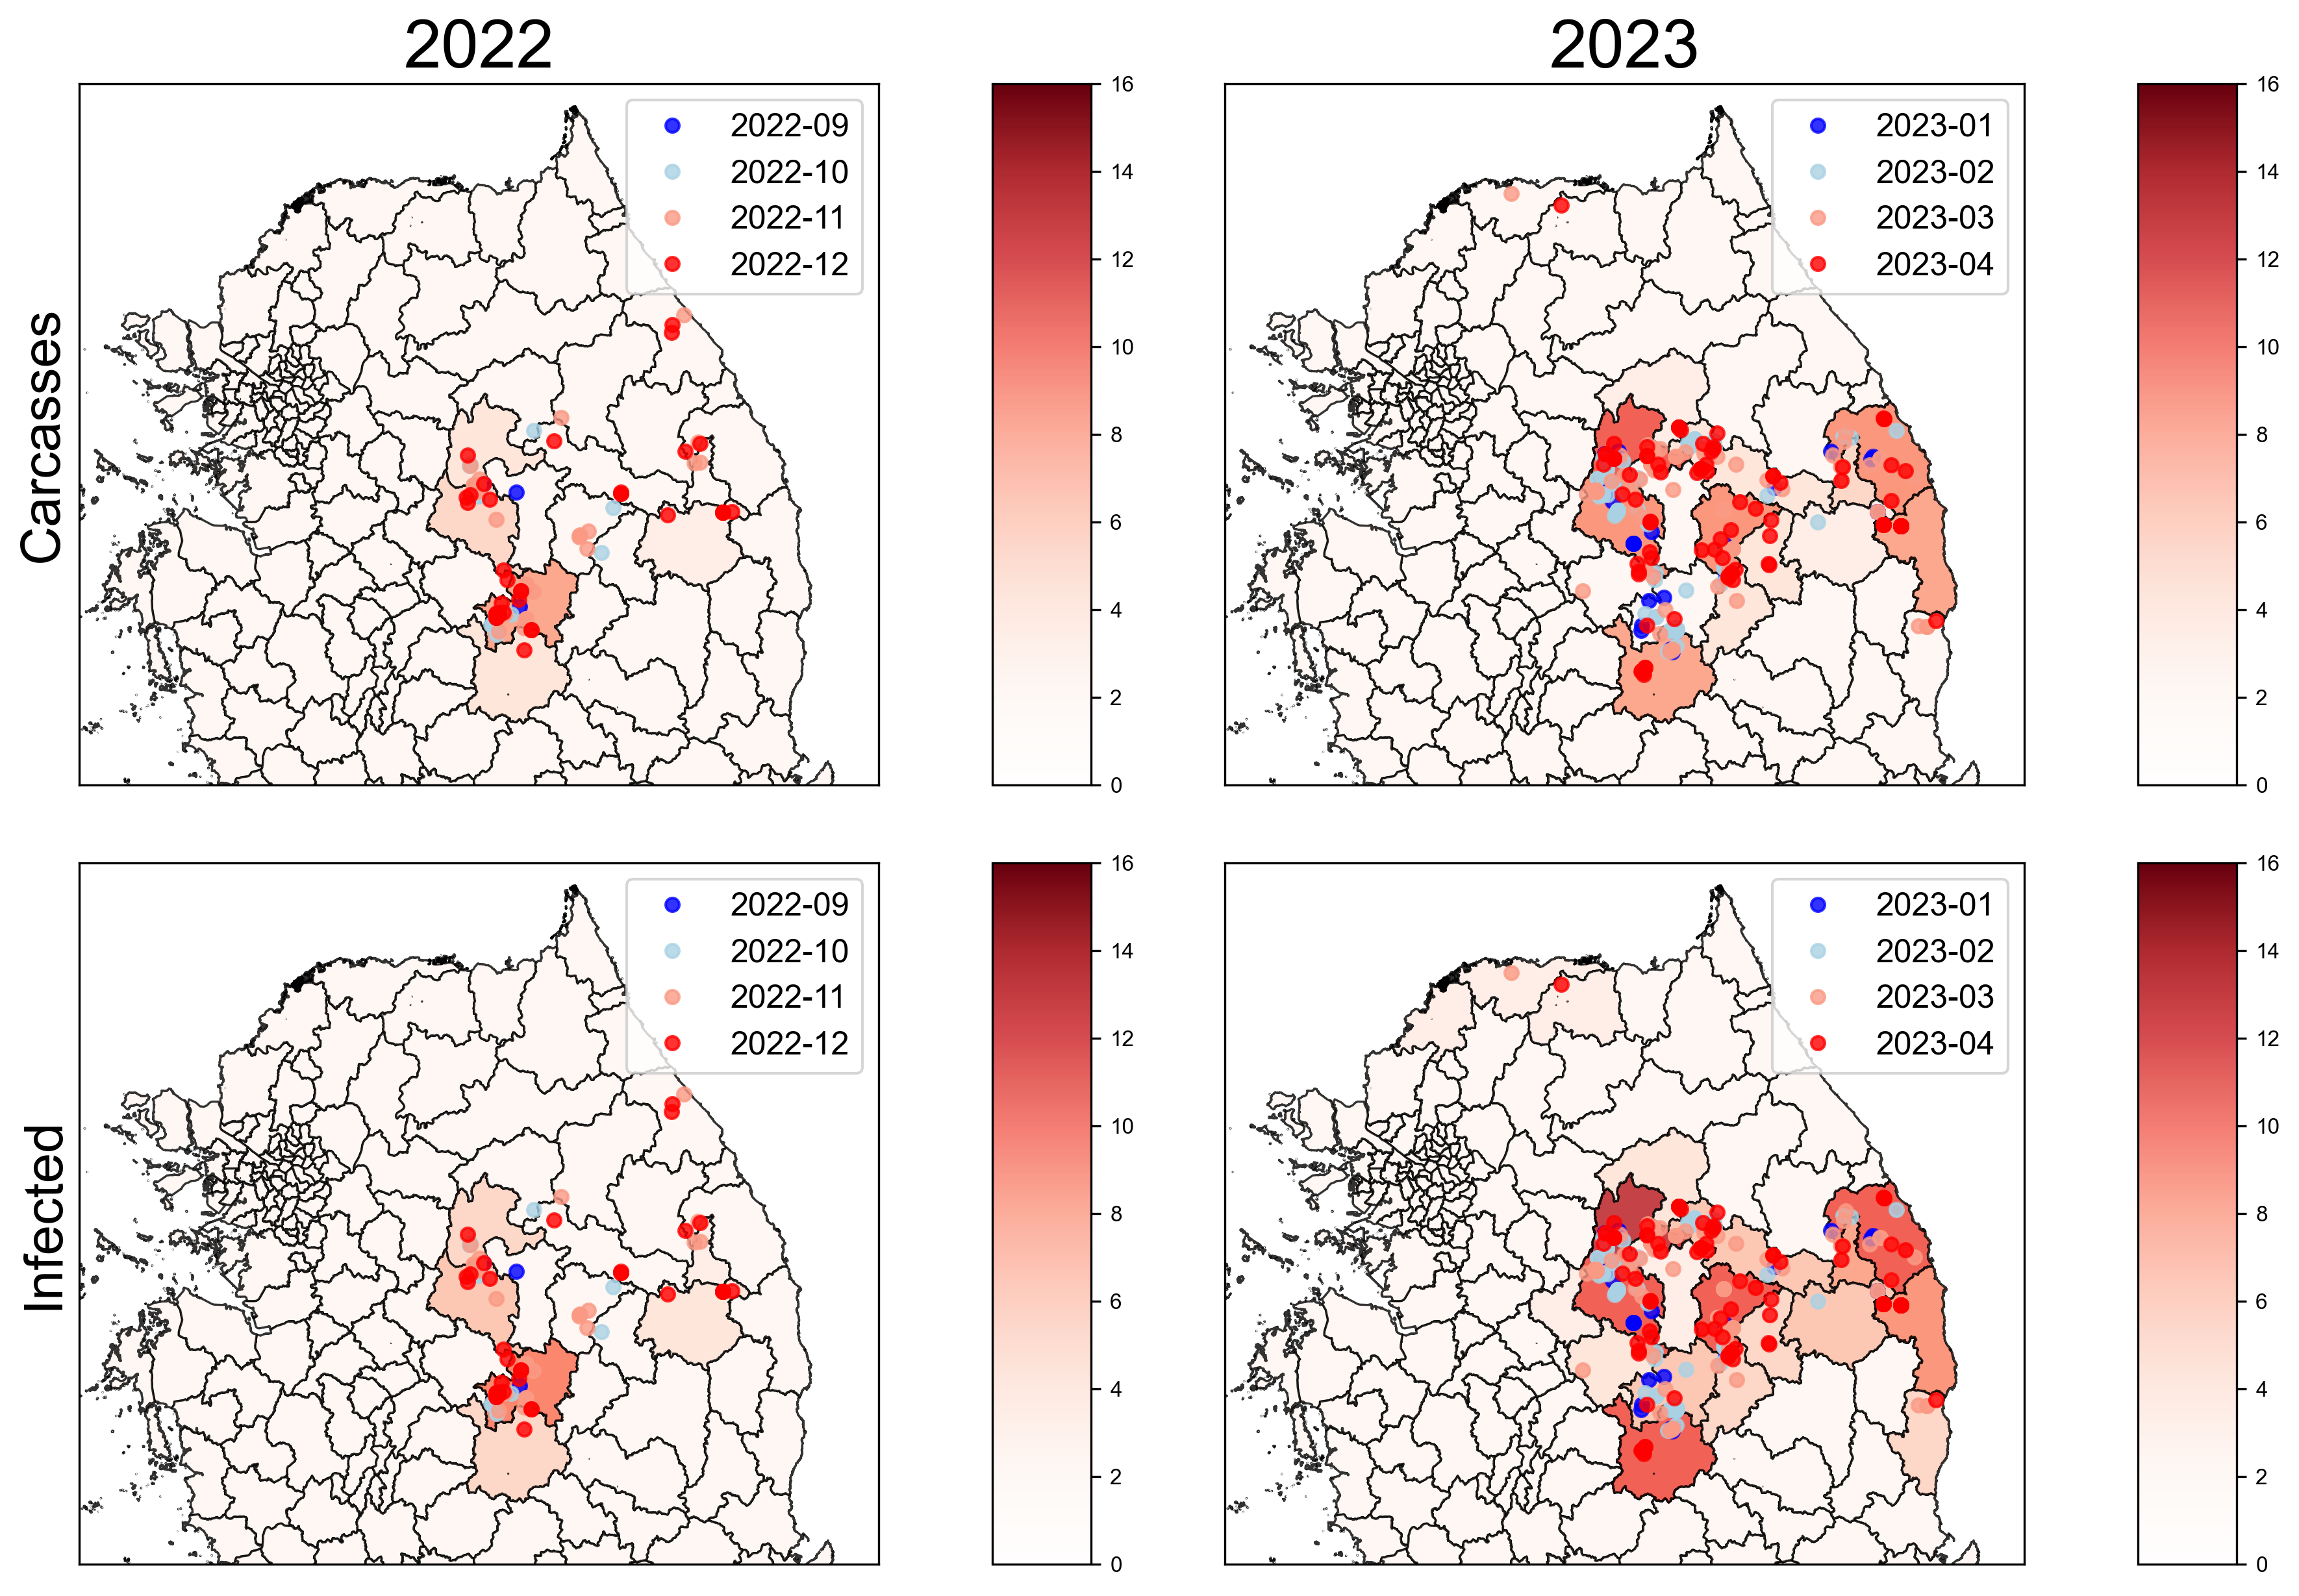

In [19]:
import matplotlib.gridspec as gridspec
title_size = 25
fig = plt.figure(figsize=(12, 8), dpi = set_dpi)

gs1_1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.57, bottom = 0.55, top = 1)
gs1_2 = fig.add_gridspec(nrows=1, ncols=1, left=0.5, right=1.1, bottom = 0.55, top = 1)
gs2_1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.57, bottom = 0.05, top = 0.50)
gs2_2 = fig.add_gridspec(nrows=1, ncols=1, left=0.5, right=1.1, bottom = 0.05, top = 0.50)

# A
axA = fig.add_subplot(gs1_1[0,0])
dividerA = make_axes_locatable(axA)
caxA = dividerA.append_axes('right', size='10%', pad='2%')

korea.plot(column='2022_car_PS', cmap=custom_cmap, linewidth=0.8, ax=axA, edgecolor='black', legend=True, cax = caxA, alpha = 0.8,
           vmin = 0, vmax = 16)
axA.plot(location_2022_9['x'], location_2022_9['y'], 'o', alpha = 0.8, markersize = 5, color = 'blue', label = '2022-09')
axA.plot(location_2022_10['x'], location_2022_10['y'], 'o', alpha = 0.8, markersize = 5, color = '#AAD2E4', label = '2022-10')
axA.plot(location_2022_11['x'], location_2022_11['y'], 'o', alpha = 0.8, markersize = 5, color = color_year[2], label = '2022-11')
axA.plot(location_2022_12['x'], location_2022_12['y'], 'o', alpha = 0.8, markersize = 5, color = 'red', label = '2022-12')
axA.set_facecolor('white')

axA.set_title('2022', fontsize = title_size)
axA.get_xaxis().set_visible(False)
axA.get_yaxis().set_ticks([])
axA.set_ylabel('Carcasses', fontsize = 20)

# B
axB = fig.add_subplot(gs1_2[0,0])
dividerB = make_axes_locatable(axB)
caxB = dividerB.append_axes('right', size='10%', pad='2%')

korea.plot(column='2023_car_PS', cmap=custom_cmap, linewidth=0.8, ax=axB, edgecolor='black', legend=True, cax=caxB, alpha = 0.8,
              vmin = 0, vmax = 16)
axB.plot(location_2023_1['x'], location_2023_1['y'], 'o', alpha = 0.8, markersize = 5, color = 'blue', label = '2023-01')
axB.plot(location_2023_2['x'], location_2023_2['y'], 'o', alpha = 0.8, markersize = 5, color = '#AAD2E4', label = '2023-02')
axB.plot(location_2023_3['x'], location_2023_3['y'], 'o', alpha = 0.8, markersize = 5, color = color_year[2], label = '2023-03')
axB.plot(location_2023_4['x'], location_2023_4['y'], 'o', alpha = 0.8, markersize = 5, color = 'red', label = '2023-04')
axB.set_facecolor('white')

axB.set_title('2023', fontsize = title_size)
axB.get_xaxis().set_visible(False)
axB.get_yaxis().set_visible(False)

axA.legend(loc = 'upper right', fontsize = 'large')
axB.legend(loc = 'upper right', fontsize = 'large')

axA.set_ylim([36,38.7])
axA.set_xlim([126,129.8])
axB.set_ylim([36,38.7])
axB.set_xlim([126,129.8])

# C
axC = fig.add_subplot(gs2_1[0,0])
dividerC = make_axes_locatable(axC)
caxC = dividerC.append_axes('right', size='10%', pad='2%')

korea.plot(column='2022_infected', cmap=custom_cmap, linewidth=0.8, ax=axC, edgecolor='black', legend=True, alpha = 0.8, cax = caxC,
           vmin = 0, vmax = 16)
axC.plot(location_2022_9['x'], location_2022_9['y'], 'o', alpha = 0.8, markersize = 5, color = 'blue', label = '2022-09')
axC.plot(location_2022_10['x'], location_2022_10['y'], 'o', alpha = 0.8, markersize = 5, color = '#AAD2E4', label = '2022-10')
axC.plot(location_2022_11['x'], location_2022_11['y'], 'o', alpha = 0.8, markersize = 5, color = color_year[2], label = '2022-11')
axC.plot(location_2022_12['x'], location_2022_12['y'], 'o', alpha = 0.8, markersize = 5, color = 'red', label = '2022-12')

axC.get_xaxis().set_visible(False)
axC.get_yaxis().set_ticks([])
axC.set_ylabel('Infected', fontsize = 20)

# D
axD = fig.add_subplot(gs2_2[0,0])
dividerD = make_axes_locatable(axD)
caxD = dividerD.append_axes('right', size='10%', pad='2%')

korea.plot(column='2023_infected', cmap=custom_cmap, linewidth=0.8, ax=axD, edgecolor='black', legend=True, alpha = 0.8, cax = caxD,
           vmin = 0, vmax = 16)
axD.plot(location_2023_1['x'], location_2023_1['y'], 'o', alpha = 0.8, markersize = 5, color = 'blue', label = '2023-01')
axD.plot(location_2023_2['x'], location_2023_2['y'], 'o', alpha = 0.8, markersize = 5, color = '#AAD2E4', label = '2023-02')
axD.plot(location_2023_3['x'], location_2023_3['y'], 'o', alpha = 0.8, markersize = 5, color = color_year[2], label = '2023-03')
axD.plot(location_2023_4['x'], location_2023_4['y'], 'o', alpha = 0.8, markersize = 5, color = 'red', label = '2023-04')

axD.set_facecolor('white')
axD.get_xaxis().set_visible(False)
axD.get_yaxis().set_visible(False)

axC.set_ylim([36,38.7])
axC.set_xlim([126,129.8])
axD.set_ylim([36,38.7])
axD.set_xlim([126,129.8])

axC.legend(loc = 'upper right', fontsize = 'large')
axD.legend(loc = 'upper right', fontsize = 'large')

plt.savefig(figure_path + 'Figure6.tif', dpi = set_dpi, bbox_inches = 'tight')
plt.show()
